### Student Information
Name:Sibongakonke Kwanele Zungu

Student ID:108065432

GitHub ID: Sibonele

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [3]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [131]:
# all neded functions
import os
import io
import re
import csv
import math
import nltk
import heapq 
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import helpers.__init__ as it
import matplotlib.pyplot as plt 

In [132]:
from sys import path
from sklearn import datasets
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from string import punctuation, digits
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg as gt
from sklearn.metrics import recall_score
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from IPython.core.display import display, HTML
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [80]:
#opening text files and passing them into a pandas dataframe
imdb = open(r'C:\Users\Sibonele\Desktop\NTHU\Data mining\Homework\DM19-Lab1-Homework1\dataset\sentiment labelled sentences\imdb_labelled.txt') 
data_file_imdb = pd.read_csv(imdb, sep="\t", header=None, names=["review", "score"])
amazon = open(r'C:\Users\Sibonele\Desktop\NTHU\Data mining\Homework\DM19-Lab1-Homework1\dataset\sentiment labelled sentences\amazon_cells_labelled.txt') 
data_file_amazon = pd.read_csv(amazon, sep="\t", header=None, names=["review", "score"])
yelp = open(r'C:\Users\Sibonele\Desktop\NTHU\Data mining\Homework\DM19-Lab1-Homework1\dataset\sentiment labelled sentences\yelp_labelled.txt') 
data_file_yelp = pd.read_csv(yelp, sep="\t", header=None, names=["review", "score"])

# creating one dataset from the three text files and creating an index
data_file=pd.DataFrame()
data_file=pd.concat([data_file_imdb, data_file_amazon,data_file_yelp])
data_file['index']=data_file.index



In [81]:
len(data_file) #length of allthe datasets together

2748

In [6]:
#Checking for null values
data_file.isnull()

,review,score,index
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [9]:
data_file.head(10) # looking at the first 10 rows

,review,score,index
0,"A very, very, very slow-moving, aimless movie ...",0,0
1,Not sure who was more lost - the flat characte...,0,1
2,Attempting artiness with black & white and cle...,0,2
3,Very little music or anything to speak of.,0,3
4,The best scene in the movie was when Gerardo i...,1,4
5,"The rest of the movie lacks art, charm, meanin...",0,5
6,Wasted two hours.,0,6
7,Saw the movie today and thought it was a good ...,1,7
8,A bit predictable.,0,8
9,Loved the casting of Jimmy Buffet as the scien...,1,9


In [15]:
#retrieving row by loc method, applied only on the review column
data_file.loc[::20, 'review'][0:20]

0      a very very very slowmoving aimless movie abou...
20     this if the first movie ive given a  to in yea...
40     frankly after cotton club and unfaithful it wa...
60     the movie had you on the edge of your seat and...
80     all the pretty pictures in the world cannot ma...
100    if you do go see this movie bring a pillow or ...
120    utterly without merit on any level this is aki...
140                  highly entertaining at all angles  
160    i totally and absolutely recommend this movie ...
180    this totally unfunny movie is so over the top ...
200    nonlinear narration thus many flashbacks and e...
220                                 that movie was bad  
240    still it was the sets that got a big  on my oy...
260    this gets a  out of  simply because theres not...
280    hackneyed writing certainly but made even wors...
300    initially the local sites in the film which wa...
320    the casting is also horrible cause all you see...
340                            

In [83]:
# making sure that columns are passed into dataframe. This part will we of great use when we are removing stop words.
columns = [ 'review', 'score', 'index']
df= pd.DataFrame(columns=columns)

Doing some preprocessing of the data_file['review'] to make sure it is clean and ready to use.

In [82]:
#lowering the string
data_file['review'] = data_file['review'].str.lower()
#removing punctuations and special chracters
data_file['review'] = data_file['review'].str.replace('[^\w\s]','')
#removing existing numbers in the review column
data_file['review'] = data_file['review'].replace('\d', '', regex=True)

In [12]:
data_file['review'].value_counts()[:20]

great phone                                                                                 6
works great                                                                                 4
dont waste your money                                                                       3
i wont be back                                                                              2
                                                                                            2
i love this place                                                                           2
if you like a loud buzzing to override all your conversations then this phone is for you    2
this is a great deal                                                                        2
dont buy this product                                                                       2
the food was terrible                                                                       2
great product                                               

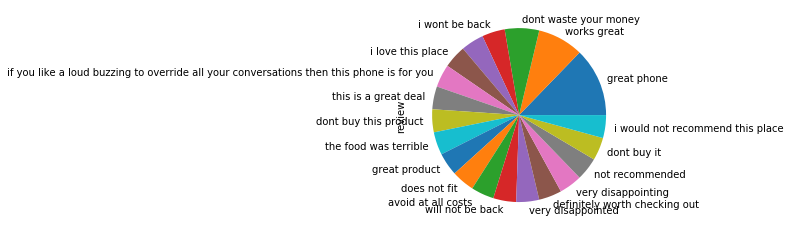

In [13]:
data_file['review'].value_counts()[:20].plot(kind='pie')

We can see from the above plot that from our dataset above that 'great phone' is a leading review in the first 20 rows. We can also plot a bargraph to visualize the same data

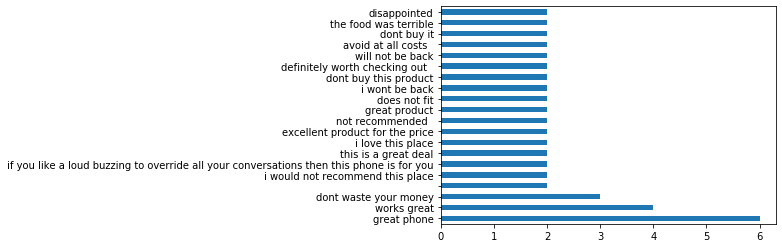

In [26]:
data_file['review'].value_counts()[:20].plot(kind='barh')

In [124]:
#lower string in data_file and passing into a new varialble
dataset=data_file['review'].str.lower()

# Preparing the review column in data_file for bag of words, a corpus is created first
corpus_df = []
for words in dataset:
     corpus_df.append(words)


vectorizer = CountVectorizer()

words=vectorizer.fit_transform(corpus_df).todense(10)
counted_words= vectorizer.vocabulary_
print(counted_words)


{'very': 4994, 'slowmoving': 4211, 'aimless': 102, 'movie': 2982, 'about': 6, 'distressed': 1301, 'drifting': 1370, 'young': 5266, 'man': 2777, 'not': 3106, 'sure': 4504, 'who': 5143, 'was': 5072, 'more': 2960, 'lost': 2710, 'the': 4617, 'flat': 1759, 'characters': 726, 'or': 3195, 'audience': 276, 'nearly': 3040, 'half': 2061, 'of': 3142, 'whom': 5148, 'walked': 5053, 'out': 3217, 'attempting': 270, 'artiness': 235, 'with': 5187, 'black': 444, 'white': 5141, 'and': 156, 'clever': 817, 'camera': 629, 'angles': 164, 'disappointed': 1267, 'became': 373, 'even': 1553, 'ridiculous': 3837, 'as': 240, 'acting': 48, 'poor': 3469, 'plot': 3445, 'lines': 2660, 'almost': 124, 'nonexistent': 3093, 'little': 2673, 'music': 3009, 'anything': 188, 'to': 4706, 'speak': 4297, 'best': 415, 'scene': 3960, 'in': 2314, 'when': 5131, 'gerardo': 1937, 'is': 2429, 'trying': 4813, 'find': 1732, 'song': 4262, 'that': 4614, 'keeps': 2510, 'running': 3896, 'through': 4670, 'his': 2178, 'head': 2114, 'rest': 3799

In [85]:
#Passing dictonary into dataframe
df_counted_words=pd.DataFrame.from_dict(counted_words, orient='index',
                       columns=['How many times each word occurs'])
print(df_counted_words)

                   How many times each word occurs
very                                          4994
slowmoving                                    4211
aimless                                        102
movie                                         2982
about                                            6
distressed                                    1301
drifting                                      1370
young                                         5266
man                                           2777
not                                           3106
sure                                          4504
who                                           5143
was                                           5072
more                                          2960
lost                                          2710
the                                           4617
flat                                          1759
characters                                     726
or                             

In [86]:
#creating a dictionary of the counted words
dictcount = {} 
for data in counted_words: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in dictcount.keys(): 
            dictcount[word] = 1
        else: 
            dictcount[word] += 1
print(dictcount)

{'very': 1, 'slowmoving': 1, 'aimless': 1, 'movie': 1, 'about': 1, 'distressed': 1, 'drifting': 1, 'young': 1, 'man': 1, 'not': 2, 'sure': 1, 'who': 1, 'was': 1, 'more': 1, 'lost': 1, 'the': 1, 'flat': 1, 'characters': 1, 'or': 1, 'audience': 1, 'nearly': 1, 'half': 1, 'of': 1, 'whom': 1, 'walked': 1, 'out': 1, 'attempting': 1, 'artiness': 1, 'with': 1, 'black': 1, 'white': 1, 'and': 1, 'clever': 1, 'camera': 1, 'angles': 1, 'disappointed': 1, 'became': 1, 'even': 1, 'ridiculous': 1, 'as': 1, 'acting': 1, 'poor': 1, 'plot': 1, 'lines': 1, 'almost': 1, 'nonexistent': 1, 'little': 1, 'music': 1, 'anything': 1, 'to': 1, 'speak': 1, 'best': 1, 'scene': 1, 'in': 1, 'when': 1, 'gerardo': 1, 'is': 1, 'trying': 1, 'find': 1, 'song': 1, 'that': 1, 'keeps': 1, 'running': 1, 'through': 1, 'his': 1, 'head': 1, 'rest': 1, 'lacks': 1, 'art': 1, 'charm': 1, 'meaning': 1, 'if': 1, 'its': 1, 'emptiness': 1, 'it': 1, 'works': 1, 'guess': 1, 'because': 1, 'empty': 1, 'wasted': 1, 'two': 1, 'hours': 1, 's

In [87]:
#Retrieving the first 1000 words which occure the most, as we have a large dataset
frequentwords = heapq.nlargest(1000, dictcount, key=dictcount.get)
print(frequentwords)

['not', 'can', 'got', 'very', 'slowmoving', 'aimless', 'movie', 'about', 'distressed', 'drifting', 'young', 'man', 'sure', 'who', 'was', 'more', 'lost', 'the', 'flat', 'characters', 'or', 'audience', 'nearly', 'half', 'of', 'whom', 'walked', 'out', 'attempting', 'artiness', 'with', 'black', 'white', 'and', 'clever', 'camera', 'angles', 'disappointed', 'became', 'even', 'ridiculous', 'as', 'acting', 'poor', 'plot', 'lines', 'almost', 'nonexistent', 'little', 'music', 'anything', 'to', 'speak', 'best', 'scene', 'in', 'when', 'gerardo', 'is', 'trying', 'find', 'song', 'that', 'keeps', 'running', 'through', 'his', 'head', 'rest', 'lacks', 'art', 'charm', 'meaning', 'if', 'its', 'emptiness', 'it', 'works', 'guess', 'because', 'empty', 'wasted', 'two', 'hours', 'saw', 'today', 'thought', 'good', 'effort', 'messages', 'for', 'kids', 'bit', 'predictable', 'loved', 'casting', 'jimmy', 'buffet', 'science', 'teacher', 'those', 'baby', 'owls', 'were', 'adorable', 'showed', 'lot', 'florida', 'at', 

In [88]:
#We can find a out how many times a word appears 
frequentwords.index('certain')

951

In [89]:
# stemming the frequent words in dataset data_file using PorterStemmer
porter = PorterStemmer()

print("{0:15}{1:15}".format("Word","Porter Stemmer"))
for word in frequentwords:
    stemmed_words=porter.stem(word)
    print("{0:15}{1:15}".format(word,porter.stem(word)))

Word           Porter Stemmer 
not            not            
can            can            
got            got            
very           veri           
slowmoving     slowmov        
aimless        aimless        
movie          movi           
about          about          
distressed     distress       
drifting       drift          
young          young          
man            man            
sure           sure           
who            who            
was            wa             
more           more           
lost           lost           
the            the            
flat           flat           
characters     charact        
or             or             
audience       audienc        
nearly         nearli         
half           half           
of             of             
whom           whom           
walked         walk           
out            out            
attempting     attempt        
artiness       arti           
with           with           
black   

   score  counts
0      0     846
1      1     827


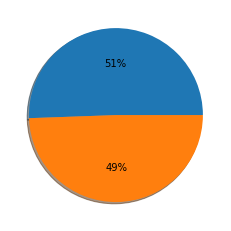

In [90]:
#Total count of each of the categories available
pd.set_option('display.width', 4000)
pd.set_option('display.max_rows', 1000)
distOfDetails = data_file.groupby(by='score', as_index=False).agg({'index': pd.Series.nunique}).sort_values(by='index', ascending=False)
distOfDetails.columns =['score', 'counts'] 
print(distOfDetails)
#Distribution of the 2 Categories
plt.pie(distOfDetails['counts'],autopct='%1.0f%%',shadow=True, startangle=360)
plt.show()

We can see on the above chart that we have a 2% difference

In the following section we are going to remove stopwords. 

In [36]:
#Before stopwords are removed
print(data_file['review'][:20])

0     a very very very slowmoving aimless movie abou...
1     not sure who was more lost  the flat character...
2     attempting artiness with black  white and clev...
3           very little music or anything to speak of  
4     the best scene in the movie was when gerardo i...
5     the rest of the movie lacks art charm meaning ...
6                                    wasted two hours  
7     saw the movie today and thought it was a good ...
8                                   a bit predictable  
9     loved the casting of jimmy buffet as the scien...
10                  and those baby owls were adorable  
11    the movie showed a lot of florida at its best ...
12    the songs were the best and the muppets were s...
13                                     it was so cool  
14    this is a very right on case movie that delive...
15    it had some average acting from the main perso...
16    this review is long overdue since i consider a...
17    ill put this gem up against any movie in t

In [91]:
#removing stop words
for index, row in data_file.iterrows():
    word_tokens = word_tokenize(row['review'])
    filtered_review = [w for w in word_tokens if not w in stopwords.words('english')]
    df= df.append({"index": row['index'], "score":  row['score'],"review": " ".join(filtered_review[0:])}, ignore_index=True)
data = df

In [38]:
print(data['review'][:20])

0     slowmoving aimless movie distressed drifting y...
1     sure lost flat characters audience nearly half...
2     attempting artiness black white clever camera ...
3                           little music anything speak
4     best scene movie gerardo trying find song keep...
5     rest movie lacks art charm meaning emptiness w...
6                                      wasted two hours
7     saw movie today thought good effort good messa...
8                                       bit predictable
9            loved casting jimmy buffet science teacher
10                                   baby owls adorable
11    movie showed lot florida best made look appealing
12                         songs best muppets hilarious
13                                                 cool
14    right case movie delivers everything almost ri...
15    average acting main person low budget clearly see
16    review long overdue since consider tale two si...
17    ill put gem movie terms screenplay cinemat

we notice that the first sentence started off by: a very very very slowmoving aimless movie..
after the removal of stop words: slowmoving aimless movie distressed drifting..
this shows us that stop words have been successfuly removed. The score has remained the same. Thus data is now the variable that contains the dataset without stop words, data_file contains the dataset with stopwords.

When stopwords are removed, you achieve more accuracy, we note that there are more changes on how many times each value occurs. With the removal of stopwords, the reviews just get straight to the point and they have become shorter.

In [39]:
data['review'].value_counts()[:20]

great phone                                       8
disappointed                                      5
works great                                       4
disappointing                                     4
dont waste money                                  3
back                                              3
waste money                                       3
boring                                            2
awful                                             2
fit                                               2
like loud buzzing override conversations phone    2
dont buy product                                  2
happy                                             2
food good                                         2
good                                              2
recommended                                       2
would recommend                                   2
food terrible                                     2
cool                                              2
love place  

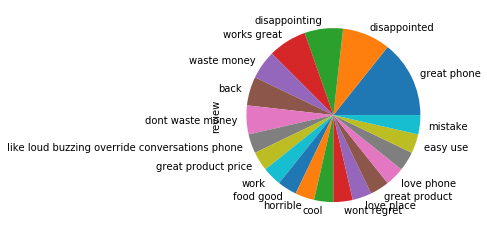

In [26]:
data['review'].value_counts()[:20].plot(kind='pie')

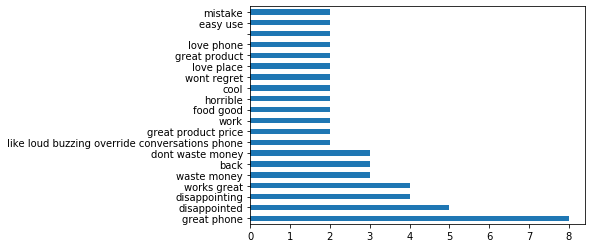

In [27]:
data['review'].value_counts()[:20].plot(kind='barh')

Above we see the different plots which have been visualized

In [92]:
X = data.values[:,0]
y = data.values[:,1]
y = y.astype(int) # we want the array in y to be of type int


In [93]:
# making sure that all values in x are of string type
X = [str (i) for i in X]

In [94]:
Vector = CountVectorizer()
X = Vector.fit_transform(X)

in the following sections, we train the model to find how accurate it is

In [95]:

X_train, X_test, y_train, y_test = train_test_split(data['review'].values.astype('U'),data_file['score'].values.astype('int32'), test_size=0.10, random_state=0)
classes  = data_file['score'].unique()

In [96]:

vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2') 
counts = vectorizer.fit_transform(X_train)
vocabulary = vectorizer.vocabulary_
classifier = SGDClassifier(alpha=1e-05,max_iter=50,penalty='elasticnet')
targets = y_train
classifier = classifier.fit(counts, targets)
example_counts = vectorizer.transform(X_test)
predictions = classifier.predict(example_counts) 

In [97]:
#Model Evaluation
acc = accuracy_score(y_test, predictions, normalize=True)
hit = precision_score(y_test, predictions, average=None,labels=classes)
capture = recall_score(y_test, predictions, average=None,labels=classes)
print('Model Accuracy:%.2f'%acc)
print(classification_report(y_test, predictions))

Model Accuracy:0.78
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       141
           1       0.76      0.80      0.78       134

    accuracy                           0.78       275
   macro avg       0.78      0.78      0.78       275
weighted avg       0.78      0.78      0.78       275



An accuracy of 0.78 was achieved with the model. Which is a good value. Errors may have resulted from the removal of stop words and stemming. Thus reducing the accuracy of the model.

TFIDF

TF = (Frequency of the word in the text file) / (Total number of words in the text file)

In [106]:
#vectorizer = TfidfVectorizer()
#tfidf = vectorizer.fit_transform(data['review'])
#print(vectorizer.get_feature_names())

In [70]:
print(tfidf.shape)

(2748, 5168)


In [109]:
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
data_fitted = tf.fit(data['review'])
data_transformed = data_fitted.transform(data['review'])
print (data_transformed )

  (0, 5151)	7.532334292222349
  (0, 4131)	8.918628653342239
  (0, 2922)	4.058816248980568
  (0, 2720)	6.43372200355424
  (0, 1339)	8.918628653342239
  (0, 1275)	8.918628653342239
  (0, 97)	8.918628653342239
  (1, 4952)	7.126869184114185
  (1, 4421)	6.146039931102459
  (1, 2979)	7.532334292222349
  (1, 2653)	6.721404076006021
  (1, 2022)	6.721404076006021
  (1, 1725)	7.82001636467413
  (1, 701)	5.452892750542514
  (1, 263)	7.309190740908139
  (2, 5032)	6.353679295880704
  (2, 3760)	7.126869184114185
  (2, 3392)	5.660532115320758
  (2, 3368)	5.699752828474039
  (2, 3031)	8.918628653342239
  (2, 2922)	4.058816248980568
  (2, 2603)	6.972718504286926
  (2, 1520)	4.655948776300924
  (2, 1241)	5.363280591852826
  (2, 792)	7.126869184114185
  :	:
  (2745, 2255)	5.9741896741758
  (2745, 1932)	4.8077547891689285
  (2745, 299)	4.6419625343261846
  (2746, 5036)	6.616043560348194
  (2746, 5013)	4.5119094060779865
  (2746, 4774)	8.225481472782295
  (2746, 4594)	4.255189559230173
  (2746, 4551)	5.134

In [111]:
#for better visualization we take a sample
data_sample=data['review'].sample(n=1000)

In [126]:
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
data_fitted = tf.fit(data_sample)
data_transformed = data_fitted.transform(data_sample)
print (data_transformed)


  (0, 2522)	5.199705077879927
  (0, 2147)	7.907755278982137
  (0, 1912)	6.521460917862246
  (0, 1910)	7.907755278982137
  (0, 1721)	7.907755278982137
  (0, 1628)	3.882403588246988
  (0, 1136)	6.521460917862246
  (0, 968)	3.7646205525906042
  (0, 598)	7.907755278982137
  (0, 334)	7.214608098422191
  (0, 134)	7.907755278982137
  (1, 2361)	7.907755278982137
  (1, 2277)	6.115995809754082
  (1, 2263)	7.907755278982137
  (1, 1990)	6.809142990314028
  (1, 1823)	7.907755278982137
  (1, 1326)	4.611918412977808
  (1, 846)	6.521460917862246
  (1, 833)	4.057607677272078
  (1, 158)	7.907755278982137
  (2, 1632)	7.907755278982137
  (2, 1355)	7.907755278982137
  (2, 1059)	7.907755278982137
  (2, 113)	6.298317366548036
  (2, 29)	7.907755278982137
  :	:
  (995, 340)	6.115995809754082
  (995, 53)	7.907755278982137
  (996, 2173)	6.521460917862246
  (996, 2080)	6.521460917862246
  (996, 2066)	5.605170185988092
  (996, 1908)	7.214608098422191
  (996, 1452)	6.298317366548036
  (996, 1381)	7.907755278982137


In [113]:
tf.vocabulary_

{'works': 2522,
 'great': 968,
 'cat': 334,
 'attacked': 134,
 'phone': 1628,
 'scratched': 1910,
 'protective': 1721,
 'strip': 2147,
 'instead': 1136,
 'destroying': 598,
 'screen': 1912,
 'fish': 846,
 'badly': 158,
 'made': 1326,
 'underwater': 2361,
 'shots': 1990,
 'repeated': 1823,
 'thousand': 2263,
 'times': 2277,
 'film': 833,
 'holster': 1059,
 'arrived': 113,
 'match': 1355,
 'photo': 1632,
 'ad': 29,
 'volume': 2431,
 'switch': 2192,
 'rocketed': 1854,
 'unit': 2370,
 'destination': 597,
 'unknown': 2372,
 'commercials': 428,
 'misleading': 1410,
 'plugged': 1665,
 'find': 838,
 'darn': 539,
 'thing': 2251,
 'worked': 2519,
 'came': 305,
 'verizon': 2413,
 'cingulair': 386,
 'nicer': 1481,
 'cell': 340,
 'phones': 1629,
 'first': 845,
 'noticed': 1496,
 'really': 1775,
 'bad': 156,
 'service': 1957,
 'love': 1308,
 'sushi': 2189,
 'found': 887,
 'kabuki': 1187,
 'overpriced': 1561,
 'overhip': 1558,
 'underservices': 2358,
 'delivery': 578,
 'time': 2274,
 'indescribably':

In [128]:
#calculating the idf
idf = tf.idf_
calc_idf= dict(zip(data_fitted.get_feature_names(), idf))
print(dict(zip(data_fitted.get_feature_names(), idf)))

{'abhor': 7.907755278982137, 'able': 7.907755278982137, 'absolute': 7.907755278982137, 'absolutel': 7.907755278982137, 'absolutely': 5.8283137373023015, 'academy': 7.907755278982137, 'accept': 7.907755278982137, 'acceptable': 7.907755278982137, 'access': 7.907755278982137, 'accessible': 7.907755278982137, 'accident': 7.907755278982137, 'accordingly': 7.907755278982137, 'accurate': 7.907755278982137, 'accused': 7.907755278982137, 'ache': 7.907755278982137, 'achievement': 7.907755278982137, 'achille': 7.907755278982137, 'acknowledged': 7.907755278982137, 'across': 7.907755278982137, 'acting': 5.422848629194137, 'actingeven': 7.907755278982137, 'action': 7.907755278982137, 'actions': 7.907755278982137, 'activesync': 7.907755278982137, 'actor': 7.907755278982137, 'actors': 6.298317366548036, 'actorsan': 7.907755278982137, 'actresses': 7.907755278982137, 'actually': 6.521460917862246, 'ad': 7.907755278982137, 'adaptation': 7.907755278982137, 'adapters': 7.907755278982137, 'added': 7.9077552